<a href="https://colab.research.google.com/github/Sadhana1842/Bharat-Intern/blob/main/Bharat_Intern_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('spam.csv', encoding='Windows-1252')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
557,ham,I know that my friend already told that.,NaN,NaN,NaN
3744,ham,"Aight, let me know when you're gonna be around...",NaN,NaN,NaN
1191,ham,Come to my home for one last time i wont do an...,NaN,NaN,NaN
3761,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,NaN,NaN,NaN
4404,ham,Dun need to use dial up juz open da browser n ...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop last thre columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
2969,ham,U should make a fb list
3470,ham,Heart is empty without love.. Mind is empty wi...
5077,spam,Do you want a New Nokia 3510i colour phone Del...
132,ham,First answer my question.
2477,ham,I'm done. I'm sorry. I hope your next space gi...


In [ ]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.sample(5)

,target,text
5422,ham,Ok k..sry i knw 2 siva..tats y i askd..
2632,ham,I WILL CAL YOU SIR. In meeting
86,ham,For real when u getting on yo? I only need 2 m...
866,ham,"Same here, but I consider walls and bunkers an..."
417,spam,FREE entry into our å£250 weekly competition j...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#missing value check
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
#remove duplicate
df=df.drop_duplicates(keep="first")

In [ ]:
df.duplicated().sum()

0

EDA


In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

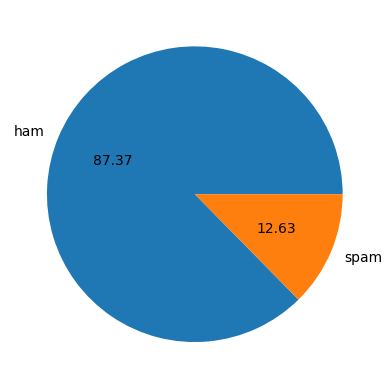

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
#data is imabalanced

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_char']=df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham
df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns


<Axes: xlabel='num_char', ylabel='Count'>

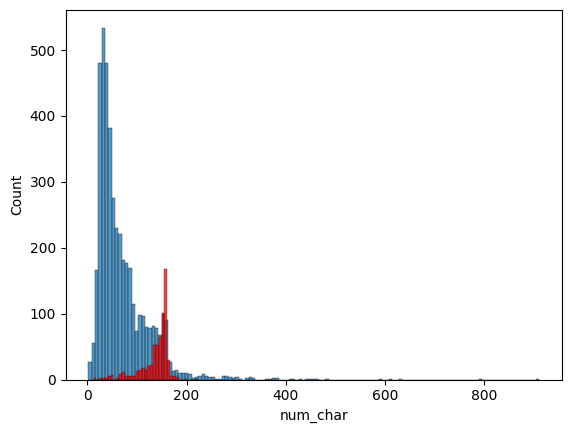

In [ ]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')


In [ ]:
#Spam messages have more words,sentences on an average

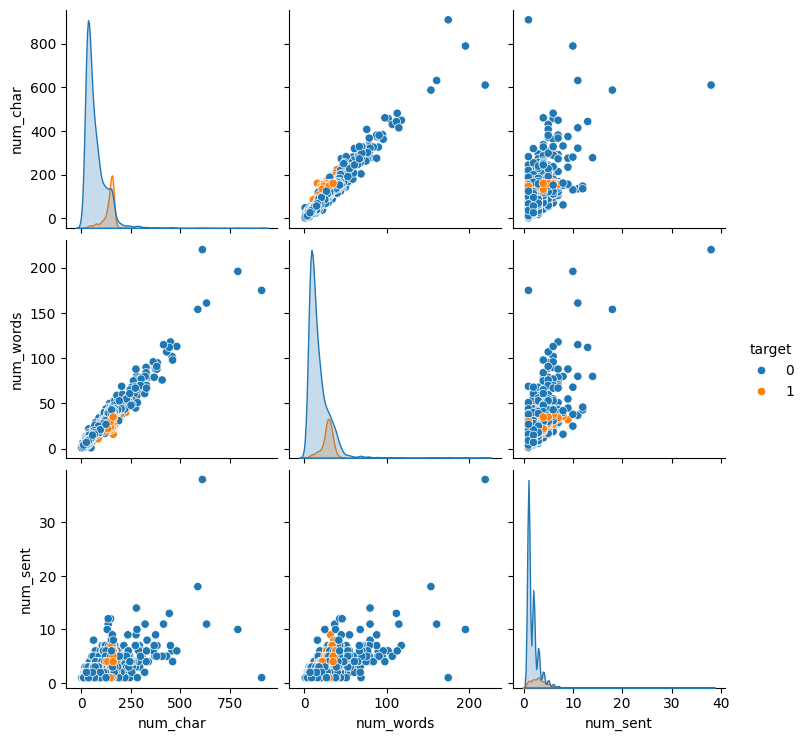

In [ ]:
sns.pairplot(df,hue='target')

<ipython-input-38-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

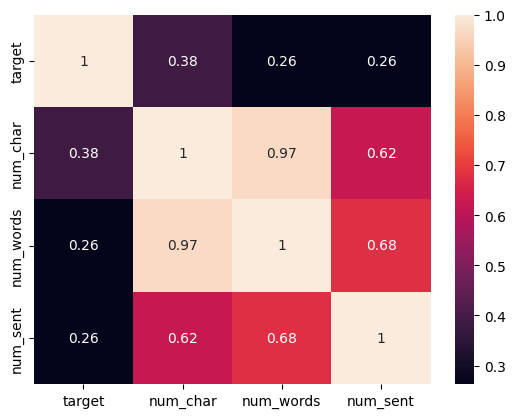

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#So the correlation between the target and num_char is higher than any other parameter.Therefore I will use that parameter for the model

Data Preprocessing

1.Lower case

2.Tokenize

3.Remove special chars

4.Remove stop words and punctuations

5.Stemming(remove similar words and put them as one)

In [ ]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
ps=PorterStemmer()

In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if(i.isalnum()):
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
df['trans_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_char,num_words,num_sent,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['trans_text'].str.cat(sep=" "))

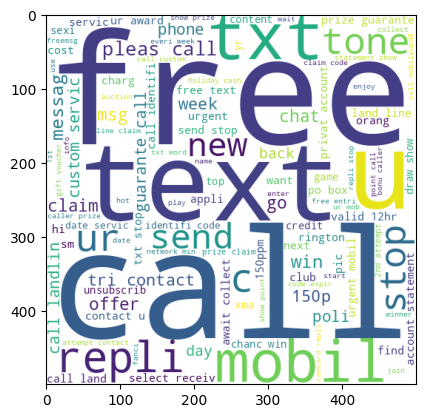

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['trans_text'].str.cat(sep=" "))

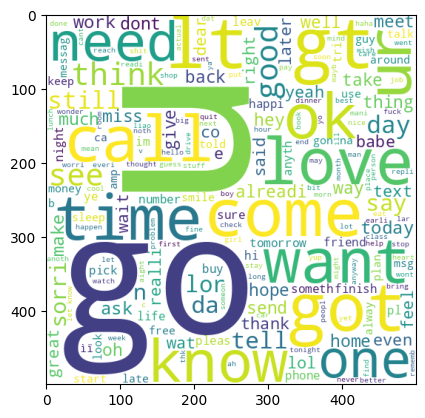

In [ ]:
plt.imshow(ham_wc)

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['trans_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [ ]:
df_spam=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['Word', 'Count'])
df_spam

,Word,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


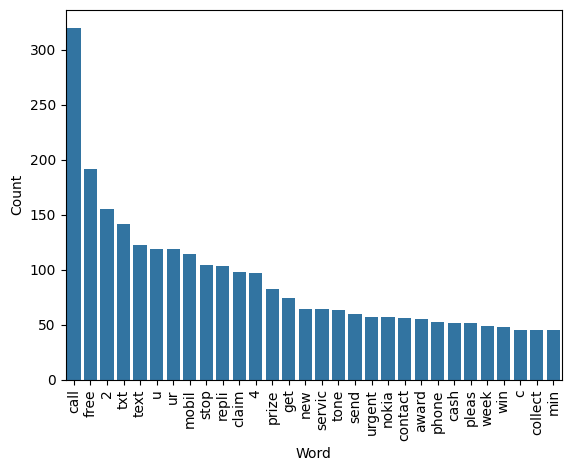

In [ ]:
sns.barplot(x='Word',y='Count',data=df_spam)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['trans_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
df_ham=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['Word', 'Count'])
df_ham

,Word,Count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


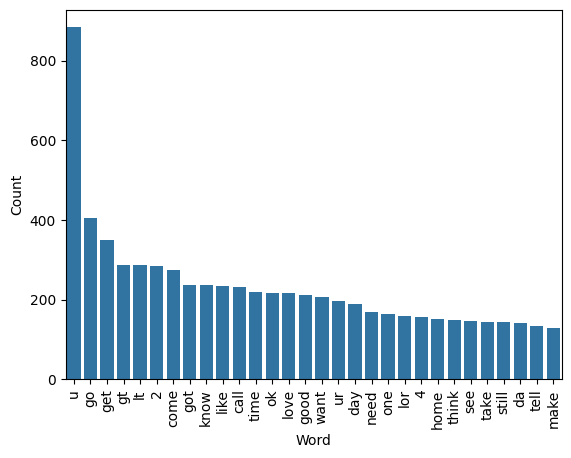

In [ ]:
sns.barplot(x='Word',y='Count',data=df_ham)
plt.xticks(rotation='vertical')
plt.show()

MODEL BUILDING

In [ ]:
#Vectorise data using bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
X=cv.fit_transform(df['trans_text']).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(5169, 6708)

In [ ]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print(precision_score(y_test,y_pred))

0.8800773694390716
[[792  20]
 [104 118]]
0.5315315315315315


In [ ]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_pred1,y_test))
print(precision_score(y_test,y_pred1))

0.9642166344294004
[[871  12]
 [ 25 126]]
0.8344370860927153


In [ ]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_pred2,y_test))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893  28]
 [  3 110]]
0.9734513274336283


In [ ]:
#vectorization using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
X=tfidf.fit_transform(df['trans_text']).toarray()

In [ ]:
X.shape


(5169, 3000)

In [ ]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print(precision_score(y_test,y_pred))

0.8694390715667312
[[788  27]
 [108 111]]
0.5068493150684932


In [ ]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_pred1,y_test))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896  30]
 [  0 108]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_pred2,y_test))
print(precision_score(y_test,y_pred2))

0.9835589941972921
[[895  16]
 [  1 122]]
0.991869918699187


Choosing MultinomialNB with tfidf due to its perfect precision score

In [ ]:
def classify_message(message):
  processed_msg=transform_text(message)
  v_msg=tfidf.transform([processed_msg])
  prediction=mnb.predict(v_msg)
  if prediction[0]==1:
    print("The message is classified as spam")
  else:
    print("The message is classfied as Not spam")

In [ ]:
user_input=input("Enter message to check: ")
classify_message(user_input)

Enter message to check: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
The message is classified as spam
